In [ ]:
!pip install numpy
!pip install matplotlib


# ***Introduction***




**OpenMP(Open Multi Processing) is An Application Program Interface (API) that may be used to explicitly direct multi-threaded, shared memory parallelism**

Goals of OpenMP:


1.   Standardization:
Provide a standard among a variety of shared memory architectures/platforms
Jointly defined and endorsed by a group of major computer hardware and software vendors
2.   Lean and Mean:
Establish a simple and limited set of directives for programming shared memory machines.
Significant parallelism can be implemented by using just 3 or 4 directives.
This goal is becoming less meaningful with each new release, apparently.
3.   Ease of Use:
Provide capability to incrementally parallelize a serial program, unlike message-passing libraries which typically require an all or nothing approach
Provide the capability to implement both coarse-grain and fine-grain parallelism
4.   Portability:
The API is specified for C/C++ and Fortran
Public forum for API and membership
Most major platforms have been implemented including Unix/Linux platforms and Windows

![](https://encyclopedia.pub/media/common/202210/mceclip1-634f75683a964.png)









# ***OpenMP Programming Model***



*   Memory Model : OpenMP is designed for multi-processor/core, shared memory machines.
![Image Description](https://hpc-tutorials.llnl.gov/openmp/images/uma.gif)


*   Execution Model :


1.   Thread Based Parallelism:
OpenMP programs accomplish parallelism exclusively through the use of threads. A thread of execution is the smallest unit of processing that can be scheduled by an operating system.
2.   Fork - Join Model:
OpenMP uses the fork-join model of parallel execution:
![](https://hpc-tutorials.llnl.gov/openmp/images/fork_join.gif)

FORK: the master thread then creates a team of parallel threads.

JOIN: When the team threads complete the statements in the parallel region construct, they synchronize and terminate, leaving only the master thread.



*   Compiler Directive Based:


Most OpenMP parallelism is specified through the use of compiler directives which are imbedded in C/C++ or Fortran source code.






# ***OpenMP API Overview***

The OpenMP API is comprised of three distinct components. As of version 4.0:

*   Compiler Directives: -
    Compiler directives appear as comments in your source code and are ignored by compilers unless you tell them otherwise - usually by specifying the appropriate compiler flag, as discussed in the Compiling section later.

  OpenMP compiler directives are used for various purposes:

1. Dividing blocks of code among threads
2. Distributing loop iterations between threads
3. Serializing sections of code
4. Synchronization of work among threads
5. Spawning a parallel region
  syntax: - #pragma omp parallel default(shared) private(beta,pi)
*   Runtime Library Routines
    The OpenMP API includes an ever-growing number of run-time library routines.

These routines are used for a variety of purposes:

1. Setting and querying the number of threads
2. Querying a thread’s unique identifier (thread ID), a thread’s ancestor’s 3. identifier, the thread team size
4. Setting and querying the dynamic threads feature
5. Querying if in a parallel region, and at what level
6. Setting and querying nested parallelism
7. setting, initializing and terminating locks and nested locks
8. Querying wall clock time and resolution
  syntax: -
    #include <omp.h>
    int omp_get_num_threads(void)
*   Environment Variables
    OpenMP provides several environment variables for controlling the execution of parallel code at run-time.

  These environment variables can be used to control such things as:

1. Setting the number of threads
2. Specifying how loop interations are divided
3. Binding threads to processors
4. Enabling/disabling nested parallelism; setting the maximum levels of
5. nested parallelism
6. Enabling/disabling dynamic threads
7. Setting thread stack size
8. Setting thread wait policy


# ***OpenMP Functions***





<style>
  table {
    font-size: 16px; /* Adjust the font size to your preference */
  }
</style>

| Function             | Description                                                                                      |
|----------------------|--------------------------------------------------------------------------------------------------|
| omp_set_num_threads  | Sets the number of threads in upcoming parallel regions, unless overridden by a num_threads clause. |
| omp_get_num_threads  | Returns the number of threads in the parallel region.                                            |
| omp_get_max_threads  | Returns an integer that is equal to or greater than the number of threads available.              |
| omp_get_thread_num   | Returns the thread number of the thread executing within its thread team.                         |
| omp_get_num_procs    | Returns the number of processors that are available.                                             |
| omp_in_parallel      | Returns nonzero if called from within a parallel region.                                          |
| omp_set_dynamic      | Indicates that the number of threads available in upcoming parallel regions can be adjusted.      |
| omp_get_dynamic      | Returns a value that indicates if the number of threads available can be adjusted.               |
| omp_set_nested       | Enables nested parallelism.                                                                      |
| omp_get_nested       | Returns a value that indicates if nested parallelism is enabled.                                  |
                              |


# ***First Program : Hello World***

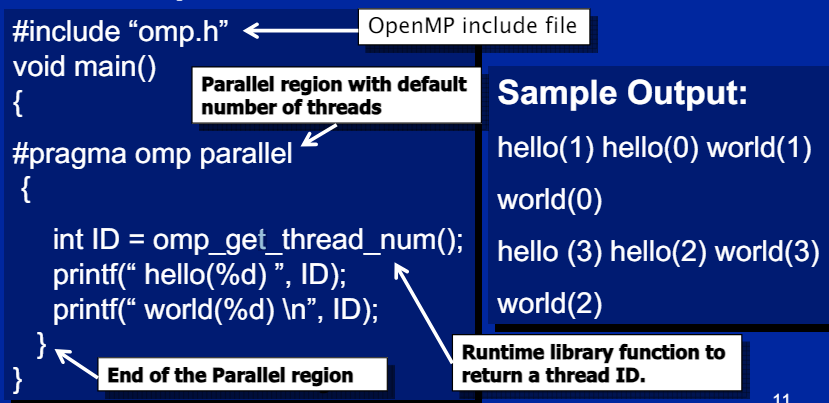

In [ ]:
%%writefile hello_openmp.c
#include <omp.h>
#include <stdio.h>

int main() {
    // Set the number of threads explicitly to 8
    omp_set_num_threads(8);

    // Start parallel region
    #pragma omp parallel
    {
        // Get thread ID
        int tid = omp_get_thread_num();

        // Print "Hello, World!" from each thread
        printf("Hello, World! from thread %d\n", tid);
    } // End parallel region

    return 0;
}


Writing hello_openmp.c


In [ ]:
!gcc -fopenmp -pg -o my_program hello_openmp.c
!./my_program

Hello, World! from thread 3
Hello, World! from thread 5
Hello, World! from thread 7
Hello, World! from thread 2
Hello, World! from thread 4
Hello, World! from thread 6
Hello, World! from thread 0
Hello, World! from thread 1


In [ ]:
!gprof my_program gmon.out > profile_report.txt
